<a href="https://colab.research.google.com/github/sowmyarshetty/Project2-AI-Class/blob/main/Project2_AI_Class.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# Import the data
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import  OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import gdown
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
#URL for downloading lung cancer data
url_lc = 'https://drive.google.com/uc?id=1qQSYbhrUczPKIj22h0AC2f9rT4ljI3BC'
gdown.download(url_lc, 'lung_cancer_prediction_dataset.csv', quiet=False)


#Read the Lung cancer data.csv
df_lc = pd.read_csv(url_lc)
df_lc.head()


Downloading...
From: https://drive.google.com/uc?id=1qQSYbhrUczPKIj22h0AC2f9rT4ljI3BC
To: /content/lung_cancer_prediction_dataset.csv
100%|██████████| 23.5M/23.5M [00:01<00:00, 22.5MB/s]


,ID,Country,Population_Size,Age,Gender,Smoker,Years_of_Smoking,Cigarettes_per_Day,Passive_Smoker,Family_History,...,Air_Pollution_Exposure,Occupational_Exposure,Indoor_Pollution,Healthcare_Access,Early_Detection,Treatment_Type,Developed_or_Developing,Annual_Lung_Cancer_Deaths,Lung_Cancer_Prevalence_Rate,Mortality_Rate
0,0,China,1400,80,Male,Yes,30,29,No,No,...,Low,Yes,No,Poor,No,NaN,Developing,690000,2.44,0.0
1,1,Iran,84,53,Male,No,0,0,Yes,No,...,Low,Yes,No,Poor,No,NaN,Developing,27000,2.10,0.0
2,2,Mexico,128,47,Male,Yes,12,6,Yes,No,...,Medium,No,No,Poor,Yes,NaN,Developing,28000,1.11,0.0
3,3,Indonesia,273,39,Female,No,0,0,No,Yes,...,Low,No,No,Poor,No,NaN,Developing,40000,0.75,0.0
4,4,South Africa,59,44,Female,No,0,0,Yes,No,...,Medium,Yes,No,Poor,No,NaN,Developing,15000,2.44,0.0


In [17]:
df_lc.dtypes

,0
ID,int64
Country,object
Population_Size,int64
Age,int64
Gender,object
Smoker,object
Years_of_Smoking,int64
Cigarettes_per_Day,int64
Passive_Smoker,object
Family_History,object


In [23]:
df_lc.columns


Index(['ID', 'Country', 'Population_Size', 'Age', 'Gender', 'Smoker',
       'Years_of_Smoking', 'Cigarettes_per_Day', 'Passive_Smoker',
       'Family_History', 'Lung_Cancer_Diagnosis', 'Cancer_Stage',
       'Survival_Years', 'Adenocarcinoma_Type', 'Air_Pollution_Exposure',
       'Occupational_Exposure', 'Indoor_Pollution', 'Healthcare_Access',
       'Early_Detection', 'Treatment_Type', 'Developed_or_Developing',
       'Annual_Lung_Cancer_Deaths', 'Lung_Cancer_Prevalence_Rate',
       'Mortality_Rate'],
      dtype='object')

In [32]:
#df_lc_scaled = StandardScaler().fit_transform(df_lc[['Country','Gender','Smoker','Passive_Smoker','Family_History', 'Lung_Cancer_Diagnosis', 'Cancer_Stage','Adenocarcinoma_Type', 'Air_Pollution_Exposure','Occupational_Exposure', 'Indoor_Pollution', 'Healthcare_Access','Early_Detection', 'Treatment_Type', 'Developed_or_Developing']])

df_lc_array = StandardScaler().fit_transform(df_lc[['Population_Size','Age','Years_of_Smoking','Cigarettes_per_Day','Survival_Years','Annual_Lung_Cancer_Deaths','Lung_Cancer_Prevalence_Rate','Mortality_Rate']])

df_lc_scaled = pd.DataFrame(df_lc_array,columns =['Population_Size','Age','Smoker','Family_History','Lung_Cancer_Diagnosis','Cancer_Stage','Adenocarcinoma_Type','Air_Pollution_Exposure','Occupational_Exposure',])
df_lc_scaled.head(5)



,Population_Size,Age,Years_of_Smoking,Cigarettes_per_Day,Survival_Years,Annual_Lung_Cancer_Deaths,Lung_Cancer_Prevalence_Rate,Mortality_Rate
0,3.350698,1.440476,1.763298,2.243636,-0.181578,4.790494,1.622573,-0.204354
1,-0.417412,0.025246,-0.660510,-0.714895,-0.181578,-0.282586,1.034380,-0.204354
2,-0.291427,-0.289250,0.309013,-0.102785,-0.181578,-0.274934,-0.678299,-0.204354
3,0.123752,-0.708577,-0.660510,-0.714895,-0.181578,-0.183114,-1.301092,-0.204354
4,-0.488995,-0.446497,-0.660510,-0.714895,-0.181578,-0.374406,1.622573,-0.204354


In [36]:
# Transform the country, gender column using get_dummies()

df_categorical_data = pd.get_dummies(df_lc[['Country','Gender','Smoker','Passive_Smoker','Family_History', 'Lung_Cancer_Diagnosis', 'Cancer_Stage','Adenocarcinoma_Type', 'Air_Pollution_Exposure','Occupational_Exposure', 'Indoor_Pollution', 'Healthcare_Access']])

df_categorical_data.head(5)


,Country_Bangladesh,Country_Brazil,Country_China,Country_DR Congo,Country_Egypt,Country_Ethiopia,Country_France,Country_Germany,Country_India,Country_Indonesia,...,Adenocarcinoma_Type_Yes,Air_Pollution_Exposure_High,Air_Pollution_Exposure_Low,Air_Pollution_Exposure_Medium,Occupational_Exposure_No,Occupational_Exposure_Yes,Indoor_Pollution_No,Indoor_Pollution_Yes,Healthcare_Access_Good,Healthcare_Access_Poor
0,False,False,True,False,False,False,False,False,False,False,...,True,False,True,False,False,True,True,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,True,False,True,False,False,True,True,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,True,False,True,False,False,True
3,False,False,False,False,False,False,False,False,False,True,...,True,False,True,False,True,False,True,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,True,True,False,False,True


In [37]:
# Concatenate the df_lc_scaled and the df_categorical_data DataFrames

df_lc_concat = pd.concat([df_lc_scaled,df_categorical_data],axis = 1)
df_lc_concat.head(5)


,Population_Size,Age,Years_of_Smoking,Cigarettes_per_Day,Survival_Years,Annual_Lung_Cancer_Deaths,Lung_Cancer_Prevalence_Rate,Mortality_Rate,Country_Bangladesh,Country_Brazil,...,Adenocarcinoma_Type_Yes,Air_Pollution_Exposure_High,Air_Pollution_Exposure_Low,Air_Pollution_Exposure_Medium,Occupational_Exposure_No,Occupational_Exposure_Yes,Indoor_Pollution_No,Indoor_Pollution_Yes,Healthcare_Access_Good,Healthcare_Access_Poor
0,3.350698,1.440476,1.763298,2.243636,-0.181578,4.790494,1.622573,-0.204354,False,False,...,True,False,True,False,False,True,True,False,False,True
1,-0.417412,0.025246,-0.660510,-0.714895,-0.181578,-0.282586,1.034380,-0.204354,False,False,...,True,False,True,False,False,True,True,False,False,True
2,-0.291427,-0.289250,0.309013,-0.102785,-0.181578,-0.274934,-0.678299,-0.204354,False,False,...,True,False,False,True,True,False,True,False,False,True
3,0.123752,-0.708577,-0.660510,-0.714895,-0.181578,-0.183114,-1.301092,-0.204354,False,False,...,True,False,True,False,True,False,True,False,False,True
4,-0.488995,-0.446497,-0.660510,-0.714895,-0.181578,-0.374406,1.622573,-0.204354,False,False,...,True,False,False,True,False,True,True,False,False,True


In [38]:
# Create a a list to store inertia values
inertia = []

# Create a a list to store the values of k
k = list(range(1, 11))

# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the spread_df DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=1)
    k_model.fit(df_lc_concat)
    inertia.append(k_model.inertia_)


In [39]:
# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()

,k,inertia
0,1,2.856694e+06
1,2,2.529327e+06
2,3,2.031585e+06
3,4,1.738743e+06
4,5,1.875111e+06


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

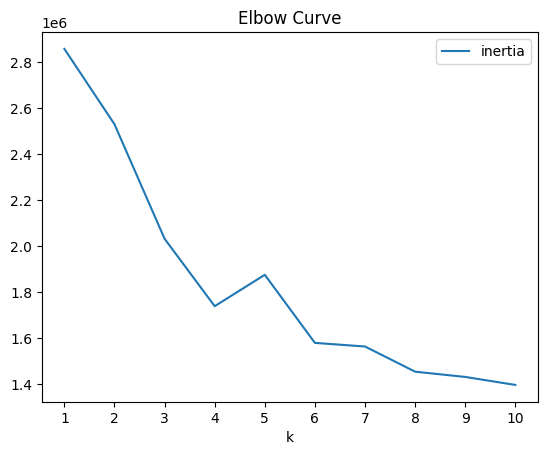

In [40]:
# Plot the elbow curve
df_elbow.plot.line(x="k",
                   y="inertia",
                   title="Elbow Curve",
                   xticks=k)